In [1]:
# Feature Creation 
# : 원본 데이터의 조합 / 변환 등을 기반하여 새로운 특징들을 구축 및 생성하는 방법 
# => 원본 데이터로 특징을 새롭게 생성하여 분석 과정 내 성능과 효율성 확보하고자 함. 

# 품질 확보 
# : 가공을 거치지 않은 Raw 데이터 활용 기반의 모델링은 품질 확보 어려움 

# 최적화된 형태 변환 
# : 효과적인 Feature를 확보하는 것이 데이터 분석 내 가장 중요한 과정임 . 

# 특징 생성 방안 
# 범주 인코딩 :
# 크게 Normal(순서가 없는)과 Ordinal(순서가 있는) 형식으로 나뉘는 범주형 변수
# 숫자가 아닌 범주 변수 값을 숫자로 표현하고 모델링에 적용하기 위한 과정

# 결합 및 분해 : 
# 데이터 셋의 변수의 조합을 기반으로 새로운 특징을 구축하는 방법
# 변수 간의 연산 혹은 분해를 통해 새로운 특징을 구축하고 입력 변수로 모델링에 적용

# 차원 축소 : 
# 원본 데이터로부터 새로운 특징의 집합을 생성하는 것
# 고차원 원시 데이터 셋을 저차원으로 차원 축소하도록 새로운 특징을 생성하는 방식

In [2]:
# 범주 인코딩 
# : 범주형 데이터의 알고리즘 적용을 위한 수치형 변환
# One-hot Encoding 
# : 순서의 의미를 지니지 않은 범주형 변수를 처리하는 대표적 방법
# : K개의 범주를 지닌 범주형 변수를 k개의 변수로 변환 

# 결합 기반 특징 생성
# 변수 간의 결합을 통해 새로운 의미를 지닌 특징을 생성
# Add / Divide / Subtract 
# : 합계 (Add) / 평균 (Divides) : 종합 외국어 능력 파악 ( 평균의 경우, 변수 값 크기 조정 및 표준화 목적 포함 )
# : 편차 (Subtract) : 특정 언어 편중 정도 파악 

# Multiply
# : 온도 압력(Multiply) : 상호작용 항(Interaction Feature)으로 온도와 압력 값의 시너지 효과 파악 
# : 도메인 지식 기반으로 특징 생성 검토 반드시 필요 

# 분해 기반 특징 생성
# : 변수의 분해를 통해 새로운 의미를 지닌 특징을 생성
# : 특정 변수 활용 기반의 새로운 의미를 파악할 수 있는 특징을 생성하는 방법
# : 도메인 지식 및 일반적 개념 기반으로 생성 가능 

# 차원 축소 목적 특징 생성
# 1. 변수들이 지닌 정보를 최대한 확보하는 저차원 데이터로 생성
# PCA ( Principal Componenet Analysis )
# : 서로 연관된 변수들이 관측되었을 때, 원본 데이터 분산 기반의 특징을 생성
# : 주성분 간의 서로 독립을 이루도록 구성 (상관관계가 없도록 구성 ) 

# 2. 군집 분석 기반의 고차원 데이터를 하나의 특징으로 차원 축소
# Featurization via Clustering

# : 고차원 데이터를 군집 분석을 기반으로 특징의 개수를 하나의 특징(군집 결과)으로 축소
# : 이렇게 획득한 군집 결과 특징을 분류 / 회귀 등 문제 해결을 위한 입력 변수로 활용 ( Stacking 방법 ) 
# : 즉, 원본 데이터 내 여러 개의 특징을 하나의 특징으로 축소하여 모델 연산 비용 감소 추구 

In [3]:
import numpy as np
import pandas as pd

In [9]:
# 실습 데이터 loading : 교육 실습을 위한 생성 데이터 
# 데이터 로딩 및 개요 확인
data = pd.read_csv("./data/encoding_sample_data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         300 non-null    object
 1   purchase_YN  300 non-null    int64 
 2   gender       300 non-null    object
 3   city         300 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


,date,purchase_YN,gender,city
0,2020-08-28 17:46:36,0,F,부산
1,2020-02-15 18:35:28,1,M,대구
2,2020-05-25 10:15:48,0,F,부산
3,2020-03-16 08:04:35,0,M,광주
4,2020-11-11 01:32:45,1,F,대전


In [12]:
data['city'].value_counts()

city
 광주    64
 서울    64
 부산    60
 대구    57
 대전    55
Name: count, dtype: int64

In [6]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def get_random_date(start_date, end_date):
    # 시작 날짜부터 끝 날짜까지의 시간 차이를 초 단위로 계산
    total_seconds = int((end_date - start_date).total_seconds())
    # 랜덤하게 초를 선택하여 시작 날짜에 더해 랜덤 날짜 생성
    random_second = np.random.randint(0, total_seconds)
    return start_date + timedelta(seconds=random_second)

In [18]:
    # 입력받을 데이터 개수
    N = int(input("Enter the number of records: "))

    # 파일 이름 설정
    file_name = "encoding_sample_data.csv"

    # 시작 날짜와 끝 날짜 설정
    start_date = datetime(2020, 1, 1, 0, 0)
    end_date = datetime(2020, 12, 31, 23, 59)

    # 랜덤 도시 리스트
    city_list = ["서울", "대전", "광주", "부산", "대구"]

    # 데이터 저장할 리스트 생성
    data = []

    # 중복 방지를 위한 기록용 딕셔너리
    time_record = {}

    # 데이터 생성
    for _ in range(N):
        # 랜덤 날짜 생성 및 중복 확인
        while True:
            random_date = get_random_date(start_date, end_date).strftime("%Y-%m-%d %H:%M:%S")
            if random_date not in time_record:
                time_record[random_date] = True
                break

        # 구매 여부 (0 또는 1)
        purchase_yn = np.random.randint(2)

        # 성별 (M 또는 F)
        gender = np.random.choice(['M', 'F'])

        # 랜덤 도시 선택
        city = np.random.choice(city_list)

        # 데이터 라인 생성
        data.append([random_date, purchase_yn, gender, city])

    # 데이터프레임 생성 및 CSV로 저장
    df = pd.DataFrame(data, columns=["date", "purchase_YN", "gender", "city"])
    df.to_csv(file_name, index=False)

Enter the number of records:  300


In [19]:
# 실습 데이터 loading : 교육 실습을 위한 생성 데이터 
# 데이터 로딩 및 개요 확인
data = pd.read_csv("./encoding_sample_data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         300 non-null    object
 1   purchase_YN  300 non-null    int64 
 2   gender       300 non-null    object
 3   city         300 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


,date,purchase_YN,gender,city
0,2020-11-04 17:46:49,0,M,부산
1,2020-04-15 08:43:46,0,M,서울
2,2020-01-15 04:23:29,0,M,대구
3,2020-01-23 14:49:51,1,M,서울
4,2020-06-15 13:08:44,0,M,대전


In [21]:
data['city']

0      부산
1      서울
2      대구
3      서울
4      대전
       ..
295    부산
296    서울
297    대구
298    대전
299    서울
Name: city, Length: 300, dtype: object

In [22]:
data['city'].counts()

AttributeError: 'Series' object has no attribute 'counts'

In [23]:
data['city'].value_counts()

city
광주    73
서울    72
대전    58
대구    51
부산    46
Name: count, dtype: int64

In [24]:
data

,date,purchase_YN,gender,city
0,2020-11-04 17:46:49,0,M,부산
1,2020-04-15 08:43:46,0,M,서울
2,2020-01-15 04:23:29,0,M,대구
3,2020-01-23 14:49:51,1,M,서울
4,2020-06-15 13:08:44,0,M,대전
...,...,...,...,...
295,2020-07-09 16:09:30,1,F,부산
296,2020-05-16 17:40:49,0,F,서울
297,2020-02-08 18:07:55,1,M,대구
298,2020-12-13 07:31:13,1,F,대전


In [25]:
# city 라는 범주형 변수 one_hot Encoding
# Pandas 의 get_dummies 함수 활용하여 쉽게 구현 가능 

encoding_data = data.copy()
encoding_data = pd.get_dummies(encoding_data, columns=['city'])
encoding_data.head()

# 기존 city 변수 내 5개의 범주가 존재 
# get_dummies 함수를 통해 원본 데이터의 city 변수 대신 각 범주별 변수가 생성 (1개 변수 => 5개 변수 ) 

,date,purchase_YN,gender,city_광주,city_대구,city_대전,city_부산,city_서울
0,2020-11-04 17:46:49,0,M,False,False,False,True,False
1,2020-04-15 08:43:46,0,M,False,False,False,False,True
2,2020-01-15 04:23:29,0,M,False,True,False,False,False
3,2020-01-23 14:49:51,1,M,False,False,False,False,True
4,2020-06-15 13:08:44,0,M,False,False,True,False,False


In [26]:
# 결합 및 분해 기반 특징 생성

# 시간대 별 파악 목적
# 어느 시간대 혹은 요일 별로 구매 결정이 높아지는지 확인하고자 할 때

creation_data = data.copy()
creation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         300 non-null    object
 1   purchase_YN  300 non-null    int64 
 2   gender       300 non-null    object
 3   city         300 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


In [27]:
# 기존 범주형 변수인 date 칼럼을 datetime 형식으로 변환 
creation_data['date'] = pd.to_datetime(creation_data['date'])
creation_data.head()

,date,purchase_YN,gender,city
0,2020-11-04 17:46:49,0,M,부산
1,2020-04-15 08:43:46,0,M,서울
2,2020-01-15 04:23:29,0,M,대구
3,2020-01-23 14:49:51,1,M,서울
4,2020-06-15 13:08:44,0,M,대전


In [28]:
# 데이터 타입 확인
creation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         300 non-null    datetime64[ns]
 1   purchase_YN  300 non-null    int64         
 2   gender       300 non-null    object        
 3   city         300 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 9.5+ KB


In [29]:
# date 컬럼을 연/월/일/요일 등의 의미를 지닌 변수로 분해
creation_data['year'] = creation_data['date'].dt.year # 연도
creation_data['month'] = creation_data['date'].dt.month #월
creation_data['day'] = creation_data['date'].dt.day #일
creation_data['hour'] = creation_data['date'].dt.hour #시간
creation_data['dayofweek'] = creation_data['date'].dt.dayofweek #요일 [ 월 = 0 ] 
creation_data.head()

,date,purchase_YN,gender,city,year,month,day,hour,dayofweek
0,2020-11-04 17:46:49,0,M,부산,2020,11,4,17,2
1,2020-04-15 08:43:46,0,M,서울,2020,4,15,8,2
2,2020-01-15 04:23:29,0,M,대구,2020,1,15,4,2
3,2020-01-23 14:49:51,1,M,서울,2020,1,23,14,3
4,2020-06-15 13:08:44,0,M,대전,2020,6,15,13,0


In [31]:
# 오전 / 오후의 의미를 지닌 변수 생성을 위한 결합 방안 (아래 예제는 변수 내 Group 으로 결합 )
# AM / PM 구분 변수 생성 
creation_data['ampm'] = 'AM'
creation_data.loc[creation_data['hour'] > 12 , 'ampm'] = 'PM'
creation_data

,date,purchase_YN,gender,city,year,month,day,hour,dayofweek,ampm
0,2020-11-04 17:46:49,0,M,부산,2020,11,4,17,2,PM
1,2020-04-15 08:43:46,0,M,서울,2020,4,15,8,2,AM
2,2020-01-15 04:23:29,0,M,대구,2020,1,15,4,2,AM
3,2020-01-23 14:49:51,1,M,서울,2020,1,23,14,3,PM
4,2020-06-15 13:08:44,0,M,대전,2020,6,15,13,0,PM
...,...,...,...,...,...,...,...,...,...,...
295,2020-07-09 16:09:30,1,F,부산,2020,7,9,16,3,PM
296,2020-05-16 17:40:49,0,F,서울,2020,5,16,17,5,PM
297,2020-02-08 18:07:55,1,M,대구,2020,2,8,18,5,PM
298,2020-12-13 07:31:13,1,F,대전,2020,12,13,7,6,AM


In [7]:
# 차운 축소 기반 특징 생성 (1) : PCA ( 주성분 분석 ) 


# Breast Cancer 데이터 활용 기반 실습
# 데이터 로딩 
cancer = pd.read_csv("./data/wdbc.data", header = None)

# 데이터 컬럼명 지정 
cancer.columns = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", 
                  "concave_poins_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
                  "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", 
                  "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
                  "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

# ID를 index화
cancer = cancer.set_index('id')

In [33]:
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poins_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [8]:
# Input 및 Target 구분
input_df = cancer.drop(['diagnosis'], axis = 1) # 열을 추출해야 하므로 axis = 1 로 지정
print(np.shape(input_df))

target_df = cancer[['diagnosis']]
print(np.shape(target_df))

(569, 30)
(569, 1)


In [9]:
# 30개의 독립변수 ( Input 변수 ) 로 이루어진 데이터를 주성분 분석 
# 주성분 분석 수행 이전, 각 변수의 스케일이 서로 다르기 때문에 표준화 수행 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

#Input 값을 scaling 실행 후 변환
std_scaler.fit(input_df)
input_scaled = std_scaler.transform(input_df)

#array 형태로 변환됨
input_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [10]:
# 주성분 분석 수행
from sklearn.decomposition import PCA

# 두 개 주성분만 유지시키도록 수행
# 30개 변수의 데이터를 2개의 주성분으로 남도록 변환
pca = PCA(n_components=2)
pca.fit(input_scaled)
X_pca = pca.transform(input_scaled)
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [11]:
# PCA 수행된 Input 데이터 확인
# 2개의 주성분 확인
X_pca_df = pd.DataFrame(X_pca, columns=['pc1','pc2'])
X_pca_df

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [12]:
# 2개의 주성분으로 구성된 컬럼들이 Target을 구분하기에 효율적인지 시각화로 확인
import matplotlib.pyplot as plt
import seaborn as sns

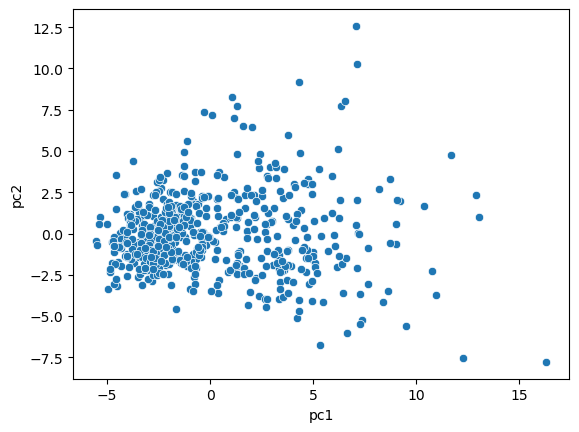

In [13]:
# 산점도로 2개의 주성분을 시각화
ax = sns.scatterplot(x='pc1',y='pc2', data = X_pca_df)

In [14]:
# Target과 확인을 위해 주성분 분석을 수행한 Input 데이터와 기존 Target 데이터를 Merge
# pca_df 생성 : 2개의 주성분 (Input) 및 1개의 Target (diagnosis)
target_df = target_df.reset_index()
pca_df = pd.merge(X_pca_df, target_df, left_index = True, right_index = True, how = 'inner')
pca_df = pca_df[['pc1','pc2','diagnosis']]
pca_df

,pc1,pc2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


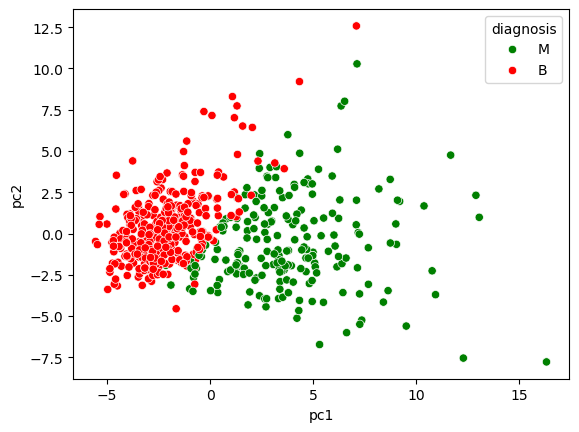

In [15]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분으로 Target과 비교
ax = sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'diagnosis', data = pca_df, palette=['green','red'])

In [16]:
# 주성분을 선택하는 다른 방안 
# 유지시킬 주성분 개수가 아닌 분산의 설명가능 수준을 비율로 선택 가능
# pca = PCA(n_components = 0.8):
# 주성분의 수는 전체 분산의 최소 80% 수준에서 설명하는 수준에서 자동으로 선택 
# 이를 통해 수치를 변경하면서 추출되는 주성분의 수 확인 가능하며, 이는 분산에 기초한 주성분 개수를 선택하는 부분에서 얼마나 많은 주성분을
# 사용할 것인지 확인해야 할때 사용 가능. 

In [17]:
# 전체 분산의 최소 80 % 수준에서 설명하는 수준의 주성분 확보
pca = PCA(n_components=0.8)
pca.fit(input_scaled)
X_pca = pca.transform(input_scaled)
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

,0,1,2,3,4
0,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723
566,1.256179,-1.902297,0.562731,-2.089227,1.809991
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742


In [18]:
# 차원 축소 기반 특징 생성 ( 2 ) : clustering (군집 분석)
# 여러 개의 변수를 하나의 변수 ( 군집결과 ) 로 변환 차원 축소

In [19]:
from sklearn.cluster import KMeans

In [20]:
#일부 변수만 선택 (30개 변수 중 15개의 변수만 임의로 선정)
# 즉, 활용할 정보의 양을 절반으로 축소
subset_df = input_df.iloc[:,0:15]
subset_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poins_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se
id,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903


In [21]:
# 데이터 스케일링 
std_scaler.fit(subset_df)
subset_input_scaled = std_scaler.transform(subset_df)
subset_input_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.83303087,
         2.48757756, -0.21400165],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  0.26332697,
         0.74240195, -0.60535085],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  0.8509283 ,
         1.18133606, -0.29700501],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.27669279,
         0.1806983 , -0.37934168],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.43852964,
         1.0095027 , -0.17299998],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.15744905,
        -0.46615196,  0.04934236]])

In [28]:
# K-means 클러스터링 활용
# 군집 Label 수 설정
k = 5 
model = KMeans(n_clusters = k, random_state = 10)

In [29]:
#scaling 한 데이터를 fit 하여 모델 학습
model.fit(subset_input_scaled)

# 클러스터링한 결과를 타겟 변수와 비교하기 위하여 원 데이터에 컬럼으로 생성
target_df['cluster'] = model.fit_predict(subset_input_scaled)

C:\Users\One\anaconda3\envs\dx_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\One\anaconda3\envs\dx_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\One\anaconda3\envs\dx_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\One\anaconda3\envs\dx_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory 

In [30]:
target_df

,id,diagnosis,cluster
0,842302,M,2
1,842517,M,0
2,84300903,M,0
3,84348301,M,1
4,84358402,M,0
...,...,...,...
564,926424,M,2
565,926682,M,0
566,926954,M,0
567,927241,M,2


In [31]:
# 15개의 임의의 변수로 만들어진 하나의 특징 ( 군집결과 ) 과 기존 target 변수 비교 
pd.crosstab(target_df.diagnosis, target_df.cluster)

cluster,0,1,2,3,4
diagnosis,,,,,
B,0,17,0,229,111
M,92,52,36,26,6
